In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
%cd /content/gdrive/My Drive/Colab Notebooks/acv assignments/assignment 2 modified/mySIMSdataset/

/content/gdrive/My Drive/Colab Notebooks/acv assignments/assignment 2 modified/mySIMSdataset


In [0]:
!ls

Unzipping and creating corresponding CSV files

In [0]:
''' Working
	# Create a ZipFile Object and load sample.zip in it
with ZipFile('Annotations_in_3_formats.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('temp')

In [0]:
class_mapping = ['car','van', 'truck', 'bus','others','airliner', 'stair_truck',
                 'pushback_truck', 'long_vehicle', 'propeller_aircraft', 
                'Chartered_aircraft','helicopter', 'trainer_aircraft', 'boat',
                'fighter_aircraft']
class_mapping = dict(enumerate(class_mapping))

create_csv('temp/training.txt', 'temp/training.csv', class_mapping)
create_csv('temp/test.txt', 'temp/test.csv', class_mapping)
create_csv('temp/validation.txt', 'temp/validation.csv', class_mapping)

class_csv = list(map(lambda x: (x[1], x[0]), class_mapping.items()))

with open('temp/classes.csv', 'w', newline="") as f:
  writer = csv.writer(f)
  writer.writerows(class_csv)

Clonning (Ack:https://github.com/fizyr/keras-retinanet)

In [12]:
!git clone https://github.com/fizyr/keras-retinanet
!pip install ./keras-retinanet/
!mv keras-retinanet/* .
!rm -r keras-retinanet
!python setup.py build_ext --inplace

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.
Processing ./keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170122 sha256=e22296edf542f6fdc0c19d2a22acef43a98c091fff8c034cc0ae1ce205174ca6
  Stored in directory: /root/.cache/pip/wheels/51/ee/ed/5be17a743c01404357493bd0d95254692d121a39ee49458f8e
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/gdrive/My Drive/Colab Notebooks/acv assignments/assignment 2 modified/mySIMSdataset/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndar

In [0]:
from keras_retinanet import models
import keras

model = models.backbone('resnet50').retinanet(num_classes=15)

In [0]:
import keras_retinanet
model.compile(
    loss={
        'regression'    : keras_retinanet.losses.smooth_l1(),
        'classification': keras_retinanet.losses.focal()
    },
    optimizer=keras.optimizers.adam(lr=1e-5, clipnorm=0.001)
)

In [5]:
model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [0]:
from keras_retinanet.preprocessing import csv_generator
TrainGenerator = csv_generator.CSVGenerator('temp/training.csv', 'temp/classes.csv')
TestGenerator = csv_generator.CSVGenerator('temp/test.csv', 'temp/classes.csv')
ValidationGenerator = csv_generator.CSVGenerator('temp/validation.csv', 'temp/classes.csv')

In [17]:
history = model.fit_generator(TrainGenerator)

Epoch 1/1
2142/3233 [==================>...........] - ETA: 3:52 - loss: 1276.3336 - regression_loss: 10.6883 - classification_loss: 1265.6453

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image temp/./images/0503.jpg with id 680 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -1. 309.  19. 346.]].
  annotations['bboxes'][invalid_indices, :]


2919/3233 [==========================>...] - ETA: 1:06 - loss: 937.3359 - regression_loss: 8.3939 - classification_loss: 928.9418

/content/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image temp/./images/2218.jpg with id 1892 (shape (768, 1024, 3)) contains the following invalid boxes: [[ -3. 177. 110. 306.]].
  annotations['bboxes'][invalid_indices, :]


3233/3233 [==============================] - 680s 210ms/step - loss: 846.5611 - regression_loss: 7.7744 - classification_loss: 838.7852


In [27]:
from keras_retinanet.callbacks.eval import Evaluate

mAP_callback = Evaluate(ValidationGenerator)
callbacks = [mAP_callback]
callbacks

In [0]:
from keras_retinanet.utils.eval import evaluate
evaluate(TestGenerator, model)

In [0]:
model.save('m.h5')

In [48]:
!python keras_retinanet/bin/convert_model.py m.h5 m_i.h5

Using TensorFlow backend.
2020-05-17 19:16:07.145826: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-17 19:16:08.991844: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-17 19:16:08.994673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-17 19:16:08.995009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-17 19:16:08.995061: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-17 19:16:08.997012: I ten

In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [50]:
model_path = os.path.join('m_i.h5')

# load retinanet model
model_ = models.load_model(model_path, backbone_name='resnet50')

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
labels_to_names=class_mapping

Qualitative Run

processing time:  0.0853731632232666


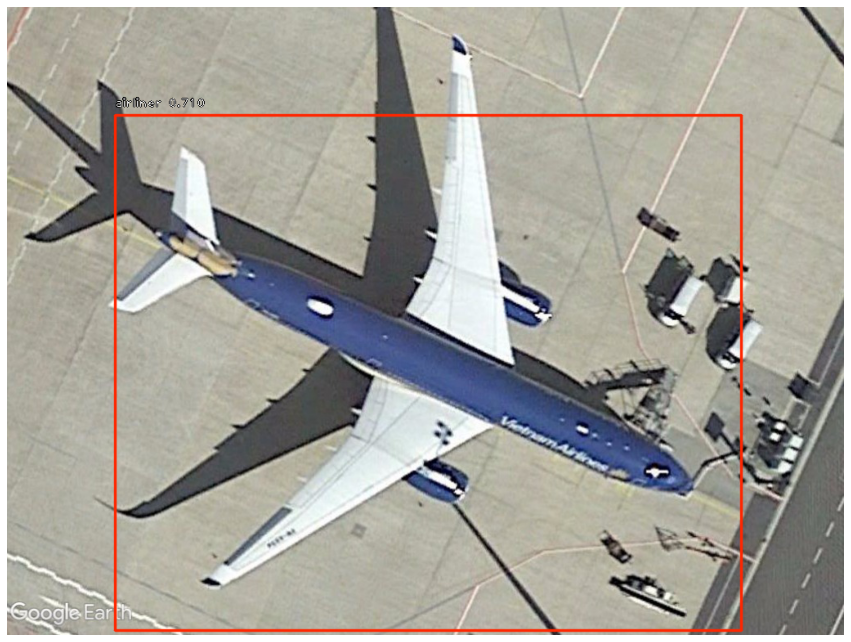

In [67]:
# load image
image = read_image_bgr('temp/./images/1557.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model_.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.0963125228881836


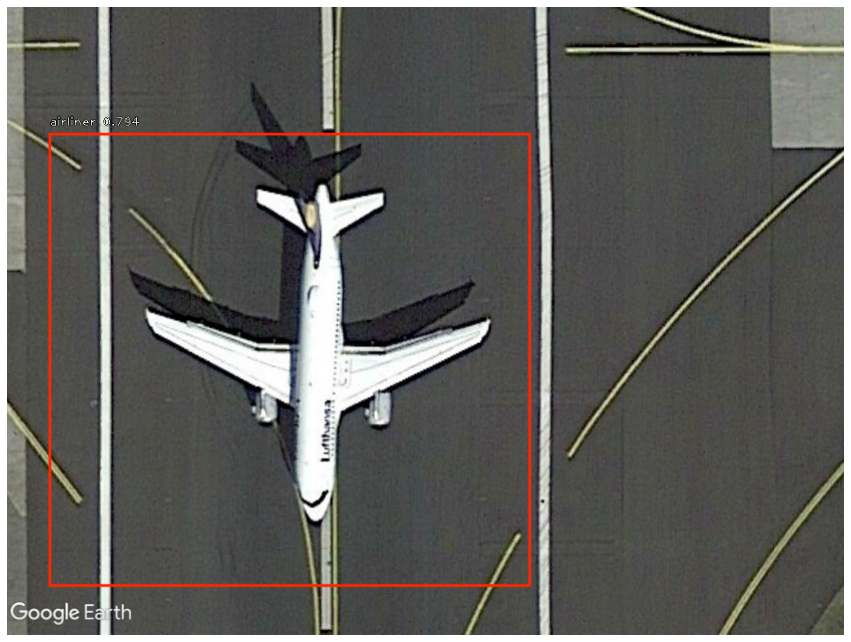

In [68]:
# load image
image = read_image_bgr('temp/./images/1530.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model_.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()